# **Projeto da Disciplina**
## **Validação de modelos de clusterização - 24E4_3**

------------------------------------

> Importação das bibliotecas necessárias para execução desse notebook

In [1]:
import sys
import subprocess
import pandas as pd
import matplotlib.pyplot as plt




# **Parte 1 - Infraestrutura**
## Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:


### 1) Você está rodando em Python 3.9+

In [2]:
print("Resposta:")
print(f"Versão do Python: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")


Resposta:
Versão do Python: 3.12.4


### 2) Você está usando um ambiente virtual: Virtualenv ou Anaconda


In [3]:
print("Resposta:")
print(sys.version)

Resposta:
3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


> **Evidências:**<br>
> Print Screen do ambiente Anaconda:<br>
> 1) Ambiente virtual no Visual Studio Code<br><br>
>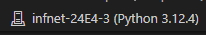<br>
>2) Ambiente virtual do Anaconda no Visual Studio Code<br><br>
>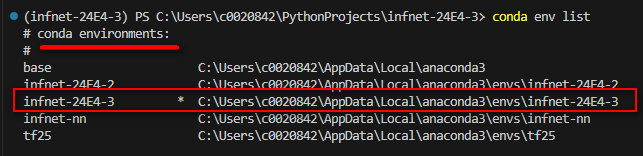<br>
>3) Ambiente Virtual do Anaconda Navigator<br><br>
>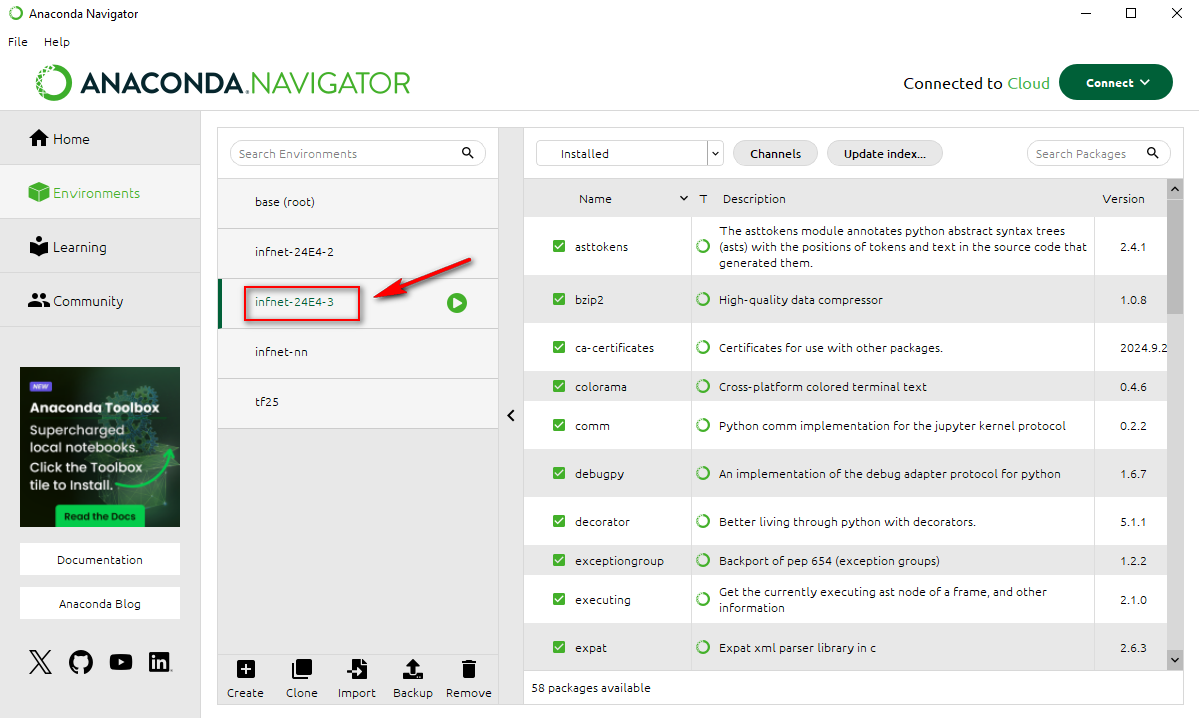

### 3) Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

In [4]:
installed_packages = subprocess.check_output(['conda', 'list']).decode()
print("Resposta:")
print("Lista de todas as bibliotecas instaladas no ambiente Anaconda para execução desse notebook:")
print(installed_packages)

Resposta:
Lista de todas as bibliotecas instaladas no ambiente Anaconda para execução desse notebook:
# packages in environment at C:\Users\c0020842\AppData\Local\anaconda3\envs\infnet-24E4-3:
#
# Name                    Version                   Build  Channel
asttokens                 2.4.1              pyhd8ed1ab_0    conda-forge
branca                    0.8.0                    pypi_0    pypi
bzip2                     1.0.8                h2bbff1b_6  
ca-certificates           2024.9.24            haa95532_0  
certifi                   2024.8.30                pypi_0    pypi
charset-normalizer        3.4.0                    pypi_0    pypi
colorama                  0.4.6              pyhd8ed1ab_0    conda-forge
comm                      0.2.2              pyhd8ed1ab_0    conda-forge
contourpy                 1.3.1                    pypi_0    pypi
cycler                    0.12.1                   pypi_0    pypi
debugpy                   1.6.7           py312hd77b12b_0  
decorator

### 4) Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. <br>É necessário se certificar que a versão do pacote está disponibilizada.

> Resposta:
> - Foi gerado um arquivo *“requirements.txt”* com todos os pacotes necessários e suas respectivas versões.
> <br>https://github.com/ianmsouza/cluster_analysis_suicide_data_Brazil_DATASUS/blob/main/requirements.txt
> - Também foi gerado o arquivo *“environment.yml”* que é específico para o ambiente virtual Anaconda, utilizado neste notebook. 
> <br>https://github.com/ianmsouza/cluster_analysis_suicide_data_Brazil_DATASUS/blob/main/environment.yml
>
> Comandos utilizados para geração dos arquivos:
> - *pip freeze > requirements.txt*
> - *conda env export > environment.yml*

### 5) Tire um printscreen do ambiente que será usado rodando em sua máquina.

> Resposta: <br>
> Print Screen da máquina com o ambiente Anaconda iniciado no Visual Studio Code.
> <br><br>
> 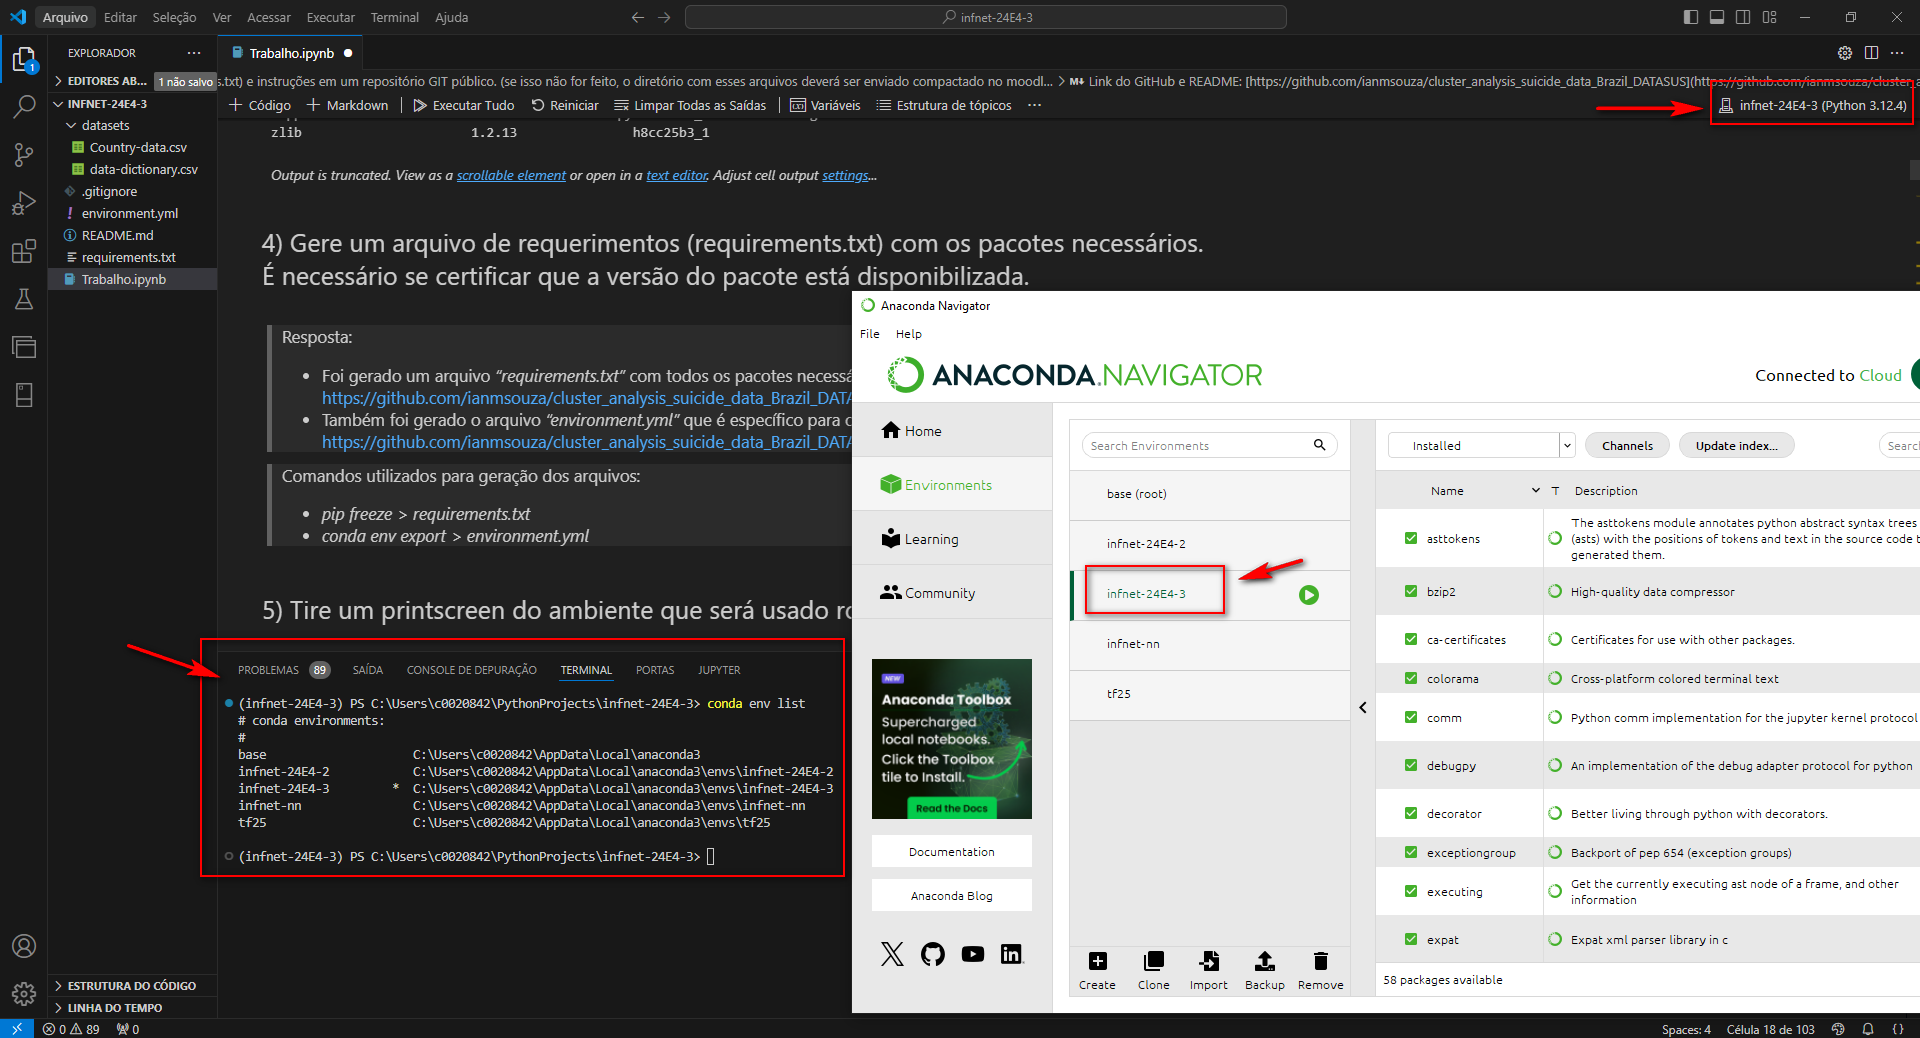

### 6) Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

> Resposta:
>
> Link do GitHub e README: [https://github.com/ianmsouza/cluster_analysis_suicide_data_Brazil_DATASUS](https://github.com/ianmsouza/cluster_analysis_suicide_data_Brazil_DATASUS)
> <br><br>
> 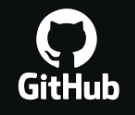

# **Parte 2 - Escolha de base de dados**
## Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

### 1) Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.

> Resposta:<br>
>
> **Dados de Suicídio no Brasil 2014 a 2018**<br>
> **Fonte:** Kaggle<br>
> https://www.kaggle.com/datasets/psicodata/dados-de-suicdio-no-brasil-2014-a-2018<br>
> Esses dados foram baixados do DATASUS e processados utilizando rotinas da linguagem Python.
>
><br><br>
> **Mais detalhes de como os dados originais foram processados antes de ser publicado no Kaggle**
>
> O processo de como os dados foram processados podem ser consultado nesses artigo e código Google Colab: 
> - https://medium.com/psicodata/baixando-e-processando-dados-do-datasus-sobre-suic%C3%ADdio-com-python-656afa17f6ad
> - https://medium.com/datapsico/download-e-pr%C3%A9-processamento-de-dados-do-sinan-datasus-sobre-viol%C3%AAncia-com-python-ddf46ff9a3f5
> - https://colab.research.google.com/drive/1xOFXO8ccaBUCWrH11tqiJFCvp1ipgcHU#scrollTo=zyq6FWmypxst
> 
> Foram considerados casos de suicídio causas básicas de morte CID-10 X60 a X84

> Importação da base de  dados oriundos do Kaggle:

In [5]:
# Carregando os dados
df = pd.read_csv(r'C:\Users\c0020842\PythonProjects\infnet-24E4-3\datasets\datasus_suicidio_2014_2018.csv', encoding='ISO-8859-1')

# Renomear as colunas conforme o novo padrão
df.columns = ['uf', 'ano', 'circunstancia_obito', 'data_obito', 'data_nascimento', 'genero', 'raca_cor', 'estado_civil', 'escolaridade', 
              'ocupacao', 'municipio', 'local_obito', 'assistencia_medica', 'causa_basica_obito', 'causa_basica_obito_0', 'idade', 'mes']


> Quantidade de linhas e colunas no dataset

In [6]:
df.shape

(58634, 17)

> Amostra dos dados presentes no dataset

In [7]:
df

,uf,ano,circunstancia_obito,data_obito,data_nascimento,genero,raca_cor,estado_civil,escolaridade,ocupacao,municipio,local_obito,assistencia_medica,causa_basica_obito,causa_basica_obito_0,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1
3,AC,2014,Suicídio,05-02-14,04-07-99,Masculino,Branca,Solteiro,4 a 7 anos,ESTUDANTE,Epitaciolândia,Outros,Não,X700,X700,15.0,2
4,AC,2014,Suicídio,06-02-14,02-05-72,Masculino,Branca,NaN,NaN,0,Rio Branco,Outros,Não,X700,X700,42.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58629,TO,2018,Suicídio,16-04-18,17-11-89,Masculino,Branca,Solteiro,8 a 11 anos,DESEMPREGADO CRONICO,Palmas,Domicílio,Não,X780,X780,29.0,4
58630,TO,2018,Suicídio,14-05-18,03-07-90,Feminino,Parda,União consensual,NaN,ESTUDANTE,Palmas,Domicílio,Não,X610,X840,28.0,5
58631,TO,2018,Suicídio,15-05-18,08-08-55,Feminino,Parda,Viúvo,Nenhuma,DONA DE CASA,Palmas,Hospital,Sim,X699,R99,63.0,5
58632,TO,2018,Suicídio,24-07-18,27-06-01,Masculino,Parda,Solteiro,8 a 11 anos,ESTUDANTE,Araguaína,Outros,Não,X700,X700,17.0,7


> Informações detalhadas de cada coluna

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58634 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uf                    58634 non-null  object 
 1   ano                   58634 non-null  int64  
 2   circunstancia_obito   56606 non-null  object 
 3   data_obito            58634 non-null  object 
 4   data_nascimento       58407 non-null  object 
 5   genero                58619 non-null  object 
 6   raca_cor              57298 non-null  object 
 7   estado_civil          54305 non-null  object 
 8   escolaridade          45162 non-null  object 
 9   ocupacao              58634 non-null  object 
 10  municipio             58634 non-null  object 
 11  local_obito           58463 non-null  object 
 12  assistencia_medica    40872 non-null  object 
 13  causa_basica_obito    58634 non-null  object 
 14  causa_basica_obito_0  58544 non-null  object 
 15  idade              

> Variáveis do dataset
>
> Observe que as variáveis foram renomeadas paramelhor compreensão.

| Nº  | Variável       | Variável renomeada    | Descrição                                | Valores |
|-----|----------------|-----------------------|------------------------------------------|---------|
| 1   | level_0        | uf                   | UF do caso registrado                   | Índices resetados |
| 2   | level_1        | ano                  | Ano do caso registrado                  | Índices resetados |
| 3   | CIRCOBITO      | circunstancia_obito  | Circunstância do óbito                  | 1: Acidente, 2: Suicídio, 3: Homicídio, 4: Outro, 0;5;6;7;8;9: NA |
| 4   | DTOBITO        | data_obito           | Data do óbito                           | - |
| 5   | DTNASC         | data_nascimento      | Data de nascimento                      | - |
| 6   | SEXO           | genero               | Sexo                                    | 1: Masculino, 2: Feminino, 0;9: NA |
| 7   | RACACOR        | raca_cor             | Raça                                    | 1: Branca, 2: Preta, 3: Amarela, 4: Parda, 5: Indígena, 0;6;7;8;9: NA |
| 8   | ESTCIV         | estado_civil         | Estado civil                            | 1: Solteiro, 2: Casado, 3: Viúvo, 4: Separado judicialmente, 5: União consensual, 0;6;7;8;9: NA |
| 9   | ESC            | escolaridade         | Escolaridade                            | 1: Nenhuma, 2: 1 a 3 anos, 3: 4 a 7 anos, 4: 8 a 11 anos, 5: 12 e mais, 8: De 9 a 11 anos, 0;6;7;9;A: NA |
| 10  | OCUP           | ocupacao             | Ocupação                                | Tabela CBO2002 (a partir de 2006) |
| 11  | CODMUNRES      | municipio            | Município de residência do falecido     | Código |
| 12  | LOCOCOR        | local_obito          | Local de ocorrência do óbito            | 1: Hospital, 2: Outro estabelecimento de saúde, 3: Domicílio, 4: Via pública, 5: Outros, 9: NA |
| 13  | ASSISTMED      | assistencia_medica   | Assistência médica                      | 1: Sim, 2: Não, 9: NA |
| 14  | CAUSABAS       | causa_basica_obito   | Causa básica do óbito                   | Código CID-10 |
| 15  | CAUSABAS_O     | causa_basica_obito_0 | Causa básica do óbito (outro formato)   | Código CID-10 |
| 16  | idade          | idade                | Idade do falecido                       | Variável adicional |
| 17  | mes            | mes                  | Mês do óbito                            | Variável adicional |


### 2) Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

> Resposta:<br>
>
> A base de dados sobre suicídios no Brasil, referente ao período de 2014 a 2018, foi selecionada por sua relevância social e potencial para análises multidimensionais. O suicídio é uma questão de saúde pública complexa, envolvendo fatores culturais, socioeconômicos, regionais e demográficos. Analisar esses dados pode trazer insights significativos para compreender e combater esse problema tanto no Brasil quanto em escala global.
>
> A escolha foi motivada pelos seguintes aspectos:
>
> - **Compreensão de padrões regionais:** Identificar estados ou regiões com taxas mais altas ou mais baixas de suicídios, permitindo um entendimento das disparidades regionais.
>
> - **Exploração de fatores associados:** Avaliar como variáveis como gênero, faixa etária, número de suicídios e fatores socioeconômicos influenciam o comportamento de risco.
>
> - **Subsídio para políticas públicas:** Gerar informações que possam fundamentar estratégias preventivas mais eficazes, com foco em áreas prioritárias identificadas pelos padrões encontrados.
>
> Essa base de dados proporciona uma oportunidade única para abordar um tema de grande impacto social, contribuindo para a formulação de ações e políticas públicas que visem à redução das taxas de suicídio e ao suporte a populações vulneráveis.

### 3) Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. <br>Analise os resultados mostrados. <br>O que deve ser feito com os dados antes da etapa de clusterização?

> Resposta:
>
> As variáveis numérica que podem ser usada para clusterização são as variáveis 'idade', 'ano' e 'mes'.<br>
> Porém, existem variáveis categóricas que serão convertidas nas questões posteriores. 
>
> **Faixa dinâmica das variáveis do dataset**

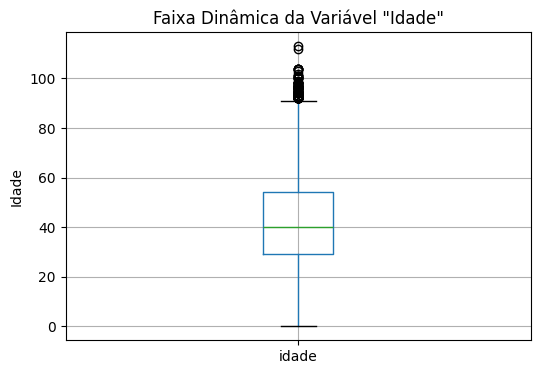

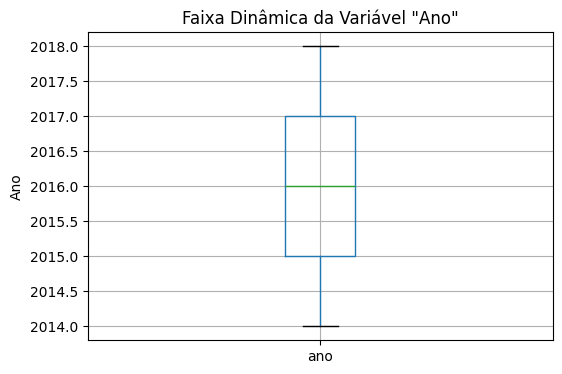

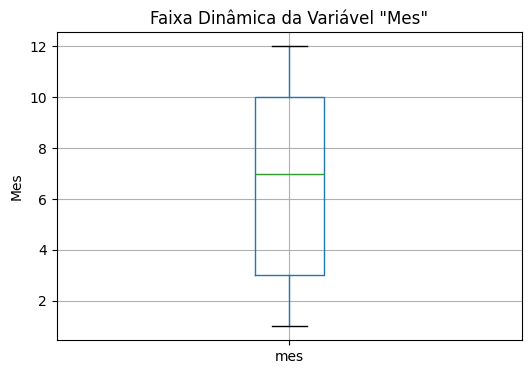

In [9]:
import matplotlib.pyplot as plt

numerical_columns = ['idade', 'ano', 'mes']

# Plotar gráficos para visualização das faixas dinâmicas
for column in numerical_columns:
    plt.figure(figsize=(6, 4))  # Tamanho ajustado para cada gráfico
    df.boxplot(column=column)  # Plotar o boxplot para cada variável
    plt.title(f'Faixa Dinâmica da Variável "{column.capitalize()}"')  # Título dinâmico com nome da variável
    plt.ylabel(column.capitalize())  # Eixo Y dinâmico
    plt.show()

> **Análise da Faixa Dinâmica das Variáveis**
>
> **Variável "Idade":**
> <br>
> A faixa dinâmica da variável "Idade" foi exibida no gráfico correspondente.
> <br>Podemos ver os valores variando em uma faixa ampla, incluindo alguns outliers.
> <br>Para a clusterização, é importante garantir que as variáveis estejam bem distribuídas e dentro de uma escala semelhante, para evitar que variáveis com grandes valores numéricos dominem o processo.
> <br><br>
> **Análise Estatística da Variável "Idade":**
> <br>
> 1. **Mínimo (idade mínima registrada):**
> <br>O menor valor observado no gráfico é 0 anos.
>
> 2. **Máximo (idade máxima registrada):**
> <br>O maior valor registrado no boxplot, excluindo outliers, está em torno de 100 anos. Os outliers ultrapassam este valor, atingindo cerca de 110 anos.
>
> 3. **Mediana (valor central):**
> <br>A mediana da idade, representada pela linha dentro da caixa do boxplot, está próxima de 40 anos, indicando que metade dos registros tem idade menor ou igual a 40 anos.
>
> 4. **Intervalo Interquartil (IQR):**
> <br>O intervalo interquartil, que corresponde à diferença entre o 3º quartil (75%) e o 1º quartil (25%), varia aproximadamente entre 30 anos e 55 anos. Este intervalo contém os valores típicos de idade sem considerar outliers.
>
> 5. **Outliers:**
> <br>Os valores acima do limite superior (cerca de 100 anos) são considerados outliers. Isso reflete registros com idade atípica, que podem ser reais ou erros nos dados.
> <br><br>
>
> **Variável "Ano":**
> <br>
> A faixa dinâmica da variável "Ano" foi exibida no gráfico correspondente.
> <br>Essa variável apresenta valores discretos, e sua distribuição é importante para entender como os anos impactam os dados analisados.
> <br><br>
> **Análise Estatística da Variável "Ano":**
> <br>
> 1. **Mínimo (ano mínimo registrado):**
> <br>O menor valor observado no gráfico é 2014.
>
> 2. **Máximo (ano máximo registrado):**
> <br>O maior valor registrado no boxplot está em 2018.
>
> 3. **Mediana (valor central):**
> <br>A mediana da variável "Ano", representada pela linha dentro da caixa do boxplot, está em 2016.
>
> 4. **Intervalo Interquartil (IQR):**
> <br>O intervalo interquartil varia entre 2015 e 2017. Este intervalo contém os valores típicos de ano sem considerar possíveis outliers.
>
> 5. **Outliers:**
> <br>Não há outliers evidentes na variável "Ano", pois os dados estão bem ajustados dentro dos limites.
> <br><br>
>
> **Variável "Mês":**
> <br>
> A faixa dinâmica da variável "Mês" também foi exibida no gráfico correspondente.
> <br>Essa variável apresenta valores que variam de forma sazonal, o que pode ser útil em análises temporais.
> <br><br>
> **Análise Estatística da Variável "Mês":**
> <br>
> 1. **Mínimo (mês mínimo registrado):**
> <br>O menor valor observado no gráfico é 1 (Janeiro).
>
> 2. **Máximo (mês máximo registrado):**
> <br>O maior valor registrado no boxplot está em 12 (Dezembro).
>
> 3. **Mediana (valor central):**
> <br>A mediana da variável "Mês", representada pela linha dentro da caixa do boxplot, está em 8 (Agosto).
>
> 4. **Intervalo Interquartil (IQR):**
> <br>O intervalo interquartil varia entre 4 (Abril) e 10 (Outubro). Este intervalo contém os valores típicos de mês sem considerar possíveis outliers.
>
> 5. **Outliers:**
> <br>Não há outliers evidentes na variável "Mês", indicando que os dados estão distribuídos de maneira uniforme dentro dos limites observados.


> **O que deve ser feito com os dados do dataset antes da etapa de clusterização:**
> 1. **Tratamento de valores ausentes:** Se existirem valores ausentes nas variáveis numéricas ou categóricas, eles devem ser tratados, seja com a imputação de valores ou remoção das linhas/colunas correspondentes.
>
> 2. **Escalonamento de variáveis:** As variáveis "Idade", "Ano" e "Mês" possuem escalas diferentes, o que pode impactar a clusterização. É necessário normalizar ou padronizar essas variáveis para que todas tenham a mesma influência no modelo.
>
> 3. **Conversão de variáveis categóricas:** Variáveis como "genero", "raca_cor", "estado_civil", "escolaridade", "ocupacao", "local_obito", "assistencia_medica", "causa_basica_obito", etc., precisam ser codificadas numericamente, por meio de técnicas como one-hot encoding ou label encoding, conforme necessário.
​

> **Observação:** O pré-processamento dos dados e a conversão das variáveis cartegóricas serão realizadas na questão a seguir.

> **Análise exploratória**

In [10]:
df_suicidio = df.copy()

> **Gráfico da distribuição de suicídios por estado**
>
> Os estados de São Paulo, Minas Gerais e Rio Grande do Sul possuem os maiores números de suicídios registrados. Estados menos populosos, como Acre e Roraima, apresentam os menores números. Isso pode estar relacionado à densidade populacional e fatores socioeconômicos regionais.

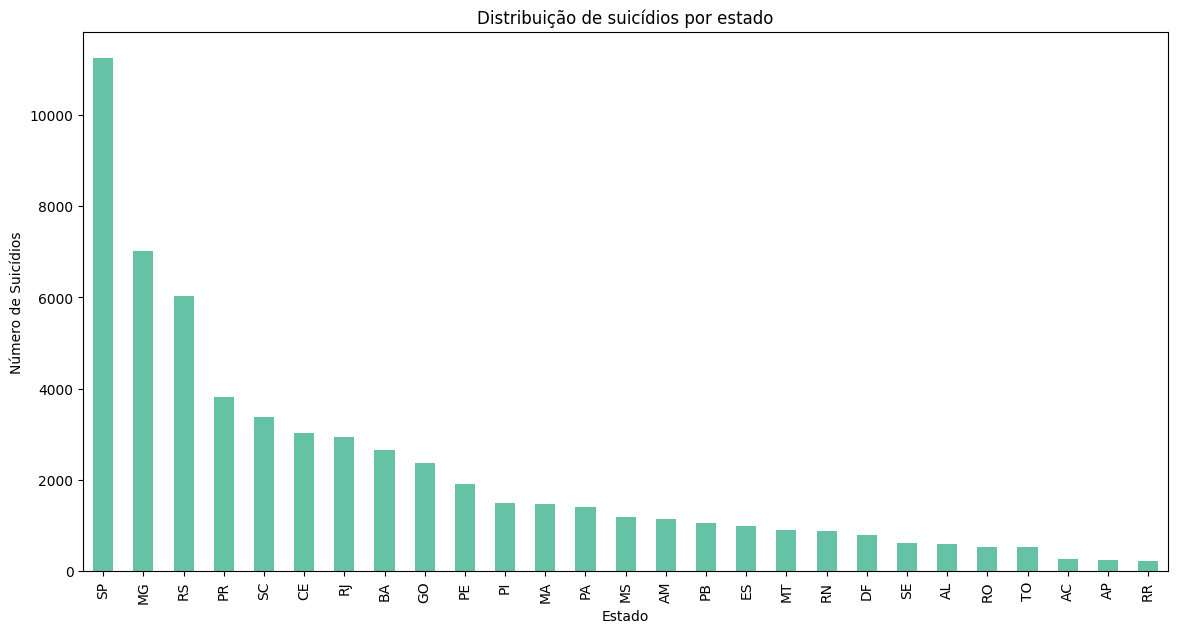

Estado com maior número de suicídios: SP


In [11]:
# Criar figura para a distribuição de suicídios por estado
plt.figure(figsize=(14, 7))
plt.title('Distribuição de suicídios por estado')

# Criar gráfico de barras com a contagem de ocorrências na coluna 'uf'
df_suicidio['uf'].value_counts().plot(kind='bar', colormap='Set2')

# Adicionar rótulos aos eixos
plt.xlabel('Estado')
plt.ylabel('Número de Suicídios')

# Exibir o gráfico
plt.show()

# Calcular e exibir o estado com maior número de casos
estado_mais_casos = df_suicidio['uf'].value_counts().idxmax()
print(f"Estado com maior número de suicídios: {estado_mais_casos}")


In [12]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Dados de coordenadas médias dos estados brasileiros
coordenadas_estados = {
    "AC": [-9.97499, -67.8243],
    "AL": [-9.5713, -36.7820],
    "AP": [1.3835, -51.8727],
    "AM": [-3.4168, -65.8561],
    "BA": [-12.5797, -41.7007],
    "CE": [-5.4984, -39.3206],
    "DF": [-15.8267, -47.9218],
    "ES": [-19.1836, -40.3089],
    "GO": [-15.8270, -49.8362],
    "MA": [-5.4026, -45.5507],
    "MT": [-12.6819, -56.9211],
    "MS": [-20.7722, -54.7852],
    "MG": [-18.5122, -44.5550],
    "PA": [-3.9656, -54.9749],
    "PB": [-7.2400, -36.7820],
    "PR": [-25.2521, -52.0215],
    "PE": [-8.8137, -36.9541],
    "PI": [-6.3310, -42.6955],
    "RJ": [-22.2753, -42.4190],
    "RN": [-5.7945, -36.9541],
    "RS": [-30.0346, -51.2177],
    "RO": [-10.9357, -62.8278],
    "RR": [1.8898, -61.2220],
    "SC": [-27.2423, -50.2189],
    "SP": [-23.5505, -46.6333],
    "SE": [-10.5741, -37.3857],
    "TO": [-10.1753, -48.2982]
}

# Agrupando os dados por estado
contagem_por_estado = df_suicidio['uf'].value_counts()

# Criar lista de pontos para o heatmap (coordenadas + intensidade)
dados_heatmap = [
    [coordenadas_estados[estado][0], coordenadas_estados[estado][1], contagem]
    for estado, contagem in contagem_por_estado.items()
]

# Criar o mapa
mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Adicionar o heatmap ao mapa
HeatMap(dados_heatmap).add_to(mapa)

# Salvar o mapa como arquivo HTML
mapa.save("heatmap_suicidios_brasil.html")

print("Mapa salvo como 'heatmap_suicidios_brasil.html'. Abra o arquivo no navegador para visualizar.")


Mapa salvo como 'heatmap_suicidios_brasil.html'. Abra o arquivo no navegador para visualizar.


> Heatmap de suicidios no Brasil

> 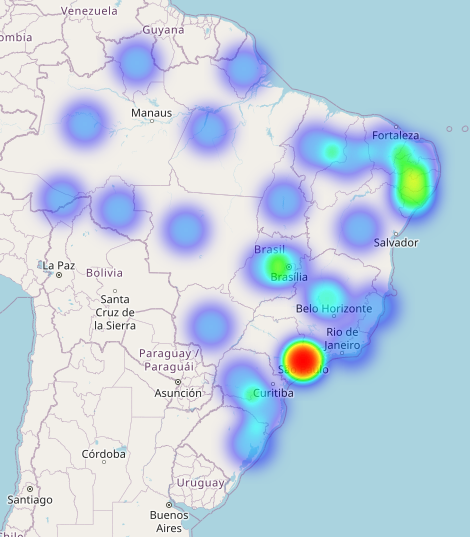

> **Gráfico da média de idade dos casos de suicídio**
>
> A faixa etária entre 30 e 50 anos tem a maior frequência de suicídios. Este padrão reflete uma concentração em idades produtivas, possivelmente associada a estresse, dificuldades econômicas e outras pressões.

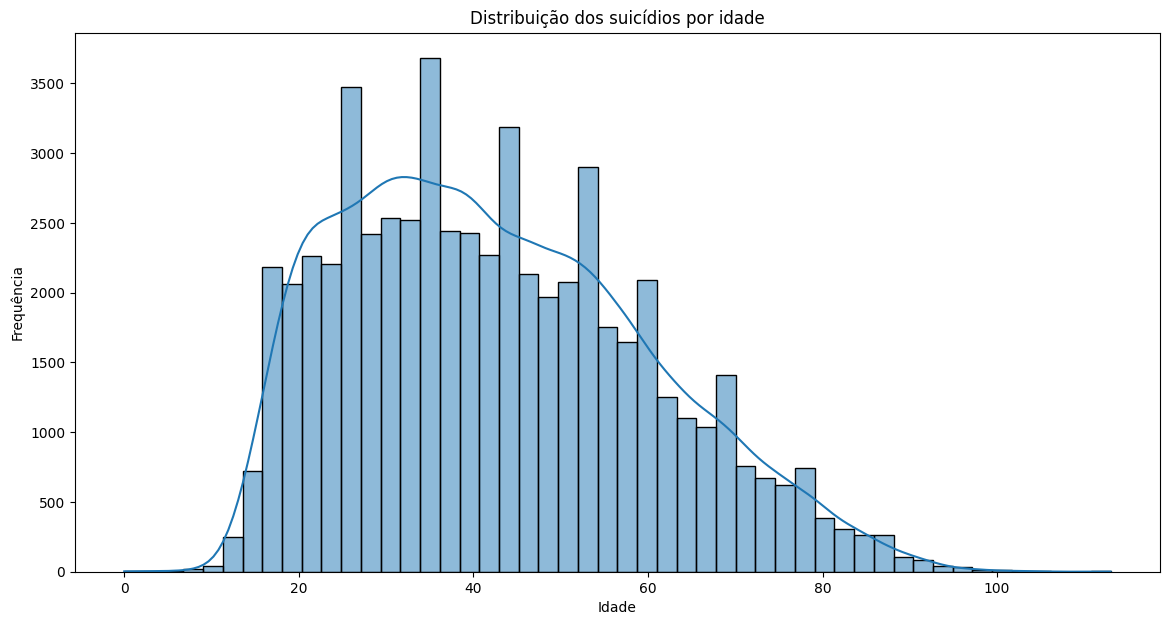

Média de idade dos casos de suicídio: 42.543308165117196


In [13]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# Criar figura para a distribuição de suicídios por idade
plt.figure(figsize=(14, 7))
plt.title('Distribuição dos suicídios por idade')

# Criar histograma com a coluna 'idade'
sns.histplot(data=df_suicidio['idade'], kde=True, bins=50)

# Exibir o gráfico
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Calcular e exibir a média da idade
idade_media = df_suicidio['idade'].mean()
print(f"Média de idade dos casos de suicídio: {idade_media}")


> **Gráfico da distribuição dos suicídios por idade e sexo**
>
> Homens apresentam maior densidade em quase todas as idades, especialmente entre 20 e 50 anos, enquanto mulheres mostram uma densidade mais baixa. Isso reflete um padrão mundial onde os homens estão mais associados a comportamentos de risco.

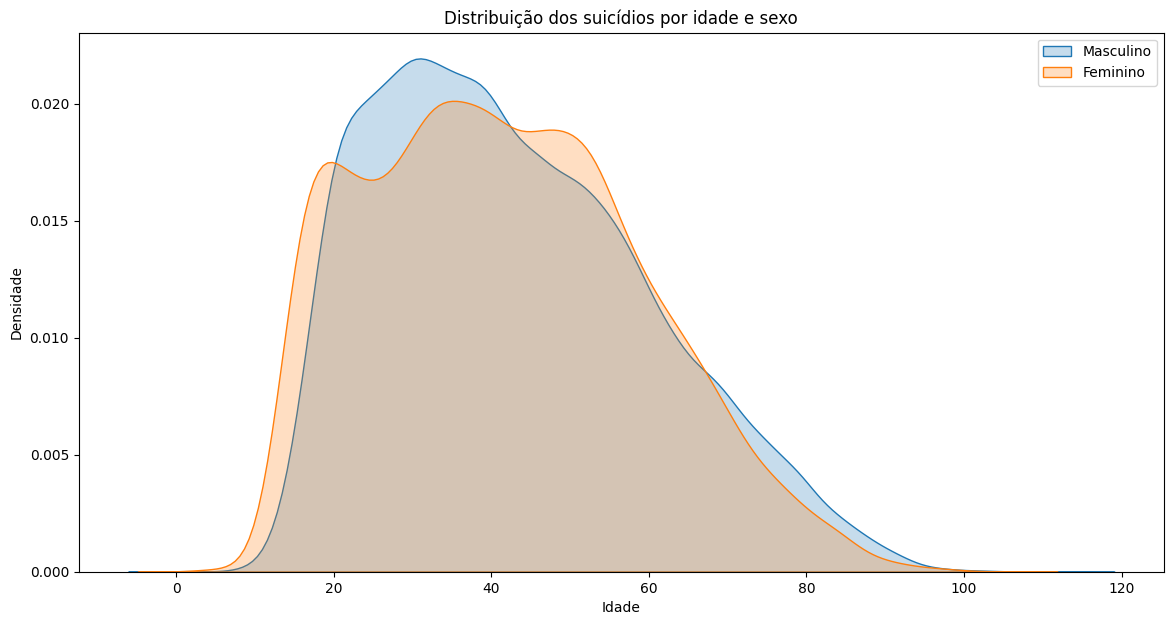

In [14]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# Criar figura para a distribuição de suicídios por idade e gênero
plt.figure(figsize=(14, 7))
plt.title('Distribuição dos suicídios por idade e sexo')

# Filtrar os dados para gênero masculino e feminino
df_suicidio_m = df_suicidio.loc[df_suicidio['genero'] == 'Masculino']
df_suicidio_f = df_suicidio.loc[df_suicidio['genero'] == 'Feminino']

# Plotar a densidade de idade para masculino
sns.kdeplot(data=df_suicidio_m['idade'], fill=True, label='Masculino')

# Plotar a densidade de idade para feminino
sns.kdeplot(data=df_suicidio_f['idade'], fill=True, label='Feminino')

# Adicionar legenda e rótulos
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.legend()
plt.show()


> **Gráfico de suicídios por sexo**
>
> O número de suicídios é substancialmente maior entre homens, reforçando um padrão já conhecido e frequentemente atribuído a métodos mais letais escolhidos por eles.

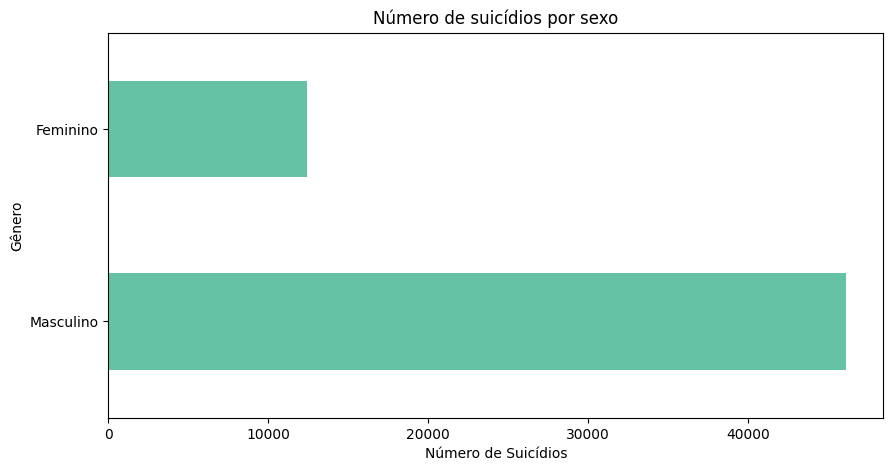

In [15]:
# Criar gráfico de barras horizontais para o número de suicídios por gênero
df_suicidio['genero'].value_counts().plot(kind='barh', figsize=(10, 5), colormap='Set2', 
                                          title='Número de suicídios por sexo')

# Exibir o gráfico
plt.xlabel('Número de Suicídios')
plt.ylabel('Gênero')
plt.show()


> **Gráfico de suicídios por estado civil**
>
> Pessoas solteiras correspondem à maior parcela, seguidas por casados. A separação e a viuvez também estão associadas, mas em menor escala.

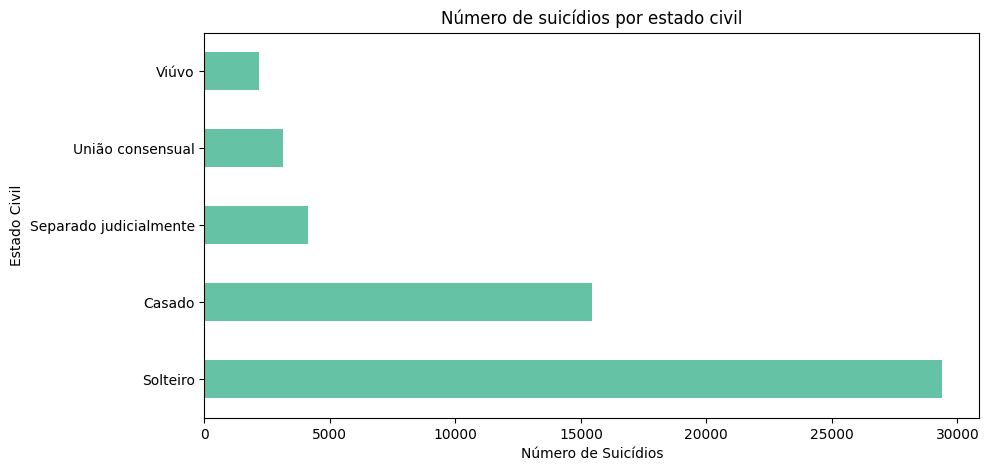

In [16]:
# Criar gráfico de barras horizontais para o número de suicídios por estado civil
df_suicidio['estado_civil'].value_counts().plot(kind='barh', title='Número de suicídios por estado civil', 
                                           figsize=(10, 5), colormap='Set2')

# Exibir o gráfico
plt.xlabel('Número de Suicídios')
plt.ylabel('Estado Civil')
plt.show()


> **Gráfico de suicídios por estado civil e sexo**
>
> Homens solteiros apresentam maior vulnerabilidade. Entre as mulheres, o padrão é similar, mas em menor escala.

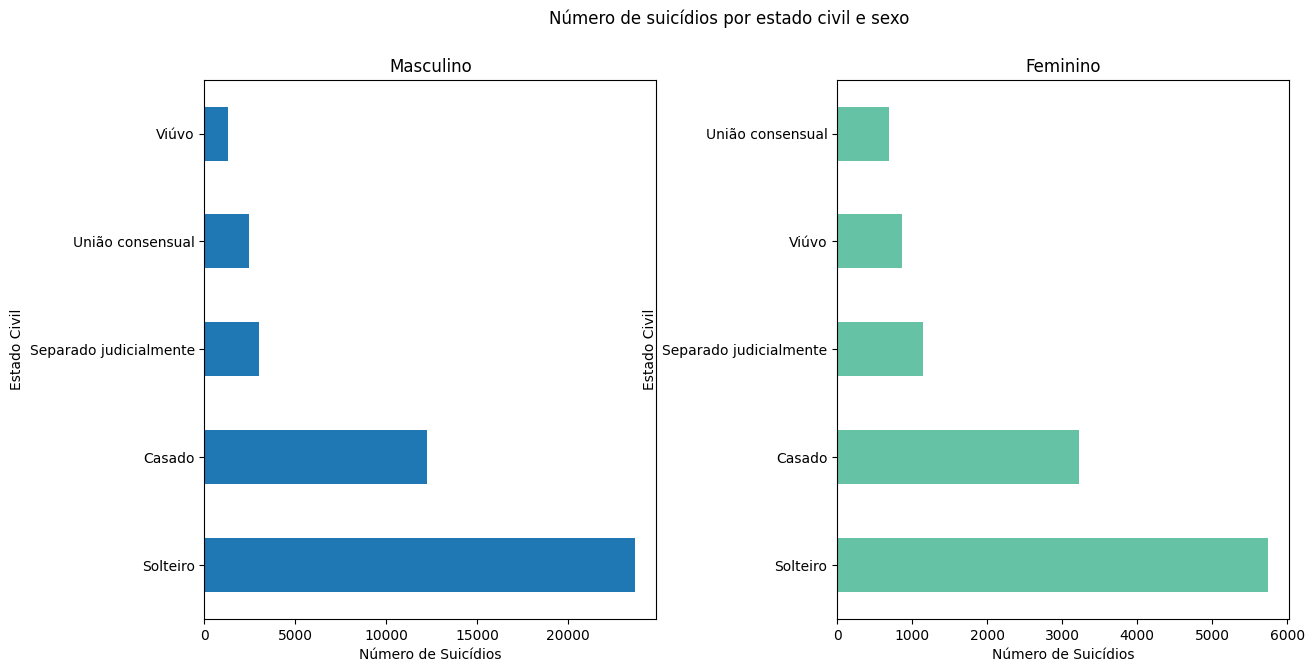

In [17]:
# Criar subplots para o número de suicídios por estado civil e gênero
figure, axes = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'wspace': 0.4})

# Gráfico para gênero masculino
df_suicidio_m['estado_civil'].value_counts().plot(kind='barh', ax=axes[0])
axes[0].set_title('Masculino')
axes[0].set_xlabel('Número de Suicídios')
axes[0].set_ylabel('Estado Civil')

# Gráfico para gênero feminino
df_suicidio_f['estado_civil'].value_counts().plot(kind='barh', ax=axes[1], colormap='Set2')
axes[1].set_title('Feminino')
axes[1].set_xlabel('Número de Suicídios')
axes[1].set_ylabel('Estado Civil')

# Título geral
figure.suptitle('Número de suicídios por estado civil e sexo')

# Exibir os gráficos
plt.show()


> **Gráfico de suicídios por ano**
>
> Há um aumento gradual no número de suicídios ao longo dos anos, indicando possíveis agravamentos em fatores socioeconômicos e de saúde mental.

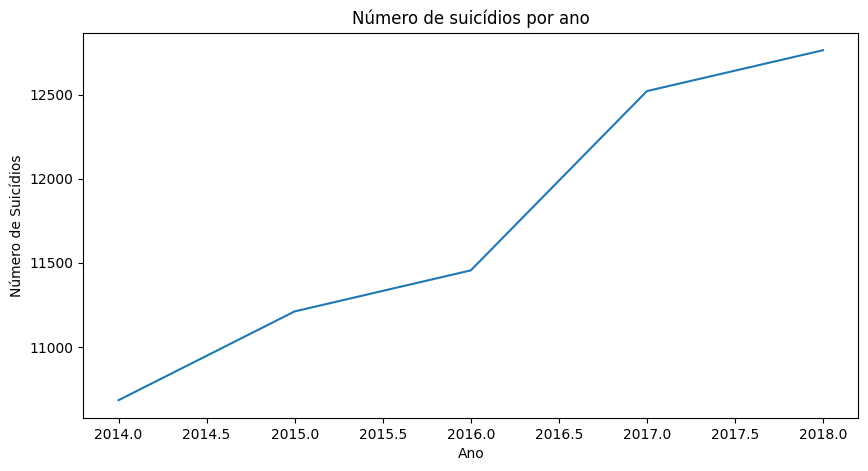

In [18]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# Criar figura para o número de suicídios por ano
plt.figure(figsize=(10, 5))
plt.title('Número de suicídios por ano')

# Plotar o gráfico de linhas com o número de suicídios por ano
sns.lineplot(data=df_suicidio['ano'].value_counts().sort_index())

# Adicionar rótulos aos eixos
plt.xlabel('Ano')
plt.ylabel('Número de Suicídios')

# Exibir o gráfico
plt.show()


> **Gráfico de suicídios por local de ocorrência**
>
> A maioria dos suicídios ocorre em domicílios, seguido de hospitais e locais públicos, indicando pouca intervenção em momentos críticos.

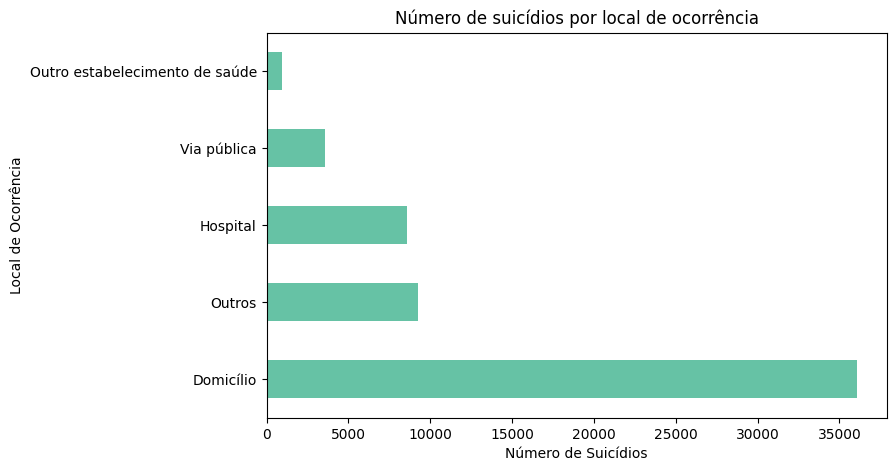

In [19]:
df_suicidio = df_suicidio[df_suicidio['local_obito'] != '6']

# Criar gráfico de barras horizontais para o número de suicídios por local de ocorrência
df_suicidio['local_obito'].value_counts().plot(kind='barh', colormap='Set2', figsize=(8, 5), 
                                               title='Número de suicídios por local de ocorrência')

# Adicionar rótulos aos eixos
plt.xlabel('Número de Suicídios')
plt.ylabel('Local de Ocorrência')

# Exibir o gráfico
plt.show()


> **Gráfico de suicídios por raça/cor da pele**
>
>  Pessoas brancas representam a maioria dos casos, seguidas por pardas e pretas, evidenciando questões sociais e acesso a serviços de saúde mental.

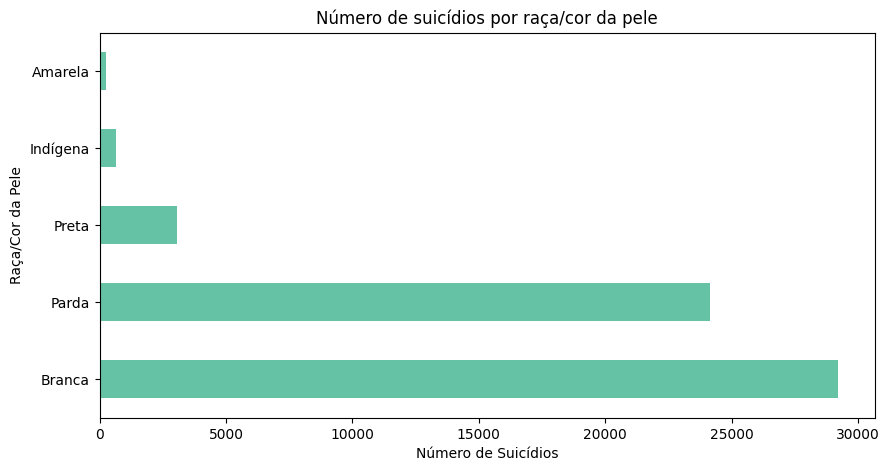

In [20]:
# Criar gráfico de barras horizontais para o número de suicídios por raça/cor da pele
df_suicidio['raca_cor'].value_counts().plot(kind='barh', colormap='Set2', figsize=(10, 5), 
                                            title='Número de suicídios por raça/cor da pele')

# Adicionar rótulos aos eixos
plt.xlabel('Número de Suicídios')
plt.ylabel('Raça/Cor da Pele')

# Exibir o gráfico
plt.show()


> **Explicação genérica do que deve ser feito antes da etapa de clusterização**
>
> **Antes da etapa de clusterização**, é importante realizar as etapas de pré-processamento e preparação de dados para garantir que os dados estejam em um formato adequado para a análise de clusters.
> 
> <b>Etapas a serem realizadas antes da clusterização:</b>
> - <b>Limpeza de dados:</b> Verificar a presença de valores ausentes e, se encontrados, removê-los ou tratá-los adequadamente para evitar impactos negativos na análise.
> - <b>Detecção e tratamento de outliers:</b> Identificar outliers e decidir se devem ser transformados, removidos ou mantidos, considerando seu impacto potencial na qualidade da clusterização.
> - <b>Normalização ou padronização:</b> Aplicar técnicas de normalização ou padronização para garantir que todas as variáveis estejam na mesma escala, evitando que alguma variável domine o processo de clusterização.
> - <b>Redução de Dimensionalidade:</b> Utilizar técnicas como PCA (Análise de Componentes Principais) para reduzir o número de variáveis, mantendo a maior parte da variabilidade dos dados.
> - <b>Seleção de Características:</b> Escolher as variáveis mais relevantes para a análise de clusterização.
> - <b>Transformação de Dados:</b> Aplicar transformações logarítmicas ou de raiz quadrada, se necessário, para lidar com distribuições assimétricas.
><br><br>

### 4) Realize o pré-processamento adequado dos dados. <br>Descreva os passos necessários.


> **Pré-processamento dos dados do dataset** ​​
>
> 1. **Valores ausentes:** Serão tratados usando o método de "forward fill", preenchendo os valores ausentes com os dados anteriores.
>
> 2. **Tratamento de outliers:** Os outliers na variável "Idade" serão identificados e removidos utilizando o método do intervalo interquartil (IQR), enquanto as variáveis "Ano" e "Mês" serão verificadas, embora não apresentem tendência significativa de outliers.
>
> 3. **Variáveis categóricas:** As variáveis como "genero", "raca_cor", "estado_civil", "escolaridade", "ocupacao", "local_obito", "assistencia_medica", e "causa_basica_obito" serão convertidas para valores numéricos usando a técnica de Label Encoding.
>
> 4. **Escalonamento das variáveis numéricas:** As variáveis "Idade", "Ano" e "Mês" serão padronizadas para garantir que todas tenham média 0 e desvio padrão 1, evitando que diferenças de escala influenciem negativamente os algoritmos de clusterização como K-Means.
>
> Desta forma os dados estarão prontos para a etapa de clusterização.

> **Limpeza de dados**
> <br>
> - Verificação de dados ausentes

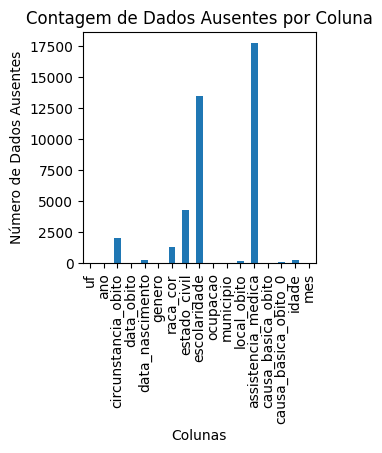

In [21]:
missing_data = df.isnull().sum()
missing_data.plot(kind='bar', figsize=(3,3))
plt.title("Contagem de Dados Ausentes por Coluna")
plt.xlabel("Colunas")
plt.ylabel("Número de Dados Ausentes")
plt.show();

In [22]:
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

Número de linhas: 58634
Número de colunas: 17


> Verificamos a presença de dados ausentes em algumas variáveis do dataset.

> **Passo 1: Tratamento de valores ausentes**

In [23]:
df.ffill(inplace=True)  # Usando o método de forward fill para tratar valores ausentes

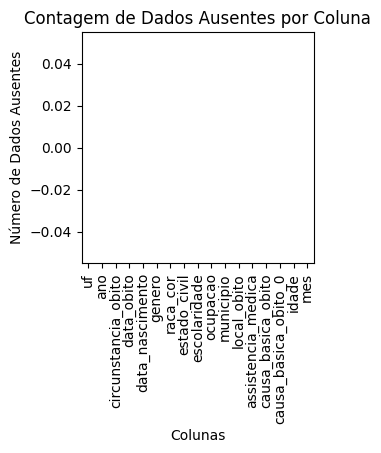

In [24]:
missing_data = df.isnull().sum()
missing_data.plot(kind='bar', figsize=(3,3))
plt.title("Contagem de Dados Ausentes por Coluna")
plt.xlabel("Colunas")
plt.ylabel("Número de Dados Ausentes")
plt.show();

In [25]:
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

Número de linhas: 58634
Número de colunas: 17


> **Passo 2, 3 e 4: Tratamento de Outliers, Codificação Categórica e Escalonamento**

In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Função para tratar outliers
def remove_outliers(df, columns):
    for column in columns:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Filtrar dados dentro dos limites
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        else:
            raise KeyError(f"A coluna '{column}' não existe no DataFrame.")
    return df

# Função para converter variáveis categóricas em numéricas
def encode_categorical_columns(df, columns):
    encoder = LabelEncoder()
    for col in columns:
        if col in df.columns:
            df[col] = encoder.fit_transform(df[col].astype(str))
        else:
            raise KeyError(f"A coluna '{col}' não foi encontrada no DataFrame.")
    return df

# Função para escalonar variáveis numéricas
def scale_columns(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Variáveis numéricas e categóricas
numerical_columns = ['idade', 'ano', 'mes']   # Variáveis numéricas originais
categorical_columns = ['genero', 'raca_cor', 'estado_civil', 'escolaridade', 
                       'ocupacao', 'local_obito', 'assistencia_medica', 'causa_basica_obito']

# Passo 2: Tratamento de Outliers
df = remove_outliers(df, numerical_columns)

# Passo 3: Conversão de variáveis categóricas para numéricas
df = encode_categorical_columns(df, categorical_columns)

# Passo 4: Escalonamento de todas as colunas relevantes
all_columns_to_scale = numerical_columns + categorical_columns
df = scale_columns(df, all_columns_to_scale)

# Exibir as primeiras linhas após o pré-processamento
print("Dados após o pré-processamento:")
print(df.head())

Dados após o pré-processamento:
   uf       ano circunstancia_obito data_obito data_nascimento    genero  \
0  AC -1.482113            Suicídio   02-01-14        02-07-77  0.519473   
1  AC -1.482113            Suicídio   23-01-14        30-07-66  0.519473   
2  AC -1.482113            Suicídio   31-01-14        28-07-43  0.519473   
3  AC -1.482113            Suicídio   05-02-14        04-07-99  0.519473   
4  AC -1.482113            Suicídio   06-02-14        02-05-72  0.519473   

   raca_cor  estado_civil  escolaridade  ocupacao       municipio  \
0  1.839596     -1.376391      0.037002 -0.857220      Rio Branco   
1 -0.945219      1.393230     -0.807529  0.370036      Rio Branco   
2 -0.945219      1.393230     -0.807529 -1.111588      Rio Branco   
3 -0.945219      0.470023      0.037002 -0.065273  Epitaciolândia   
4 -0.945219      0.470023      0.037002 -1.111588      Rio Branco   

   local_obito  assistencia_medica  causa_basica_obito causa_basica_obito_0  \
0    -0.668839   

In [27]:
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

Número de linhas: 58497
Número de colunas: 17


> Após o tratamento de outliers, tivemos a diminuição de números de linhas de 58.634 para 58.497.

> **Justificativa para Exclusão de Variáveis no Pré-Processamento**
>
> As variáveis **`uf`**, **`data_obito`**, **`data_nascimento`**, **`municipio`** e **`causa_basica_obito_0`** não foram convertidas em numéricas porque possuem características que dificultam sua interpretação direta no contexto da clusterização:
>
> 1. **`uf` e `municipio`**:  
   São variáveis categóricas com grande número de categorias e sem uma relação ordinal ou proximidade natural. A conversão poderia introduzir correlações artificiais, prejudicando os resultados da análise.
>
> 2. **`data_obito` e `data_nascimento`**:  
   Representam datas que, sem transformação adequada (como extração de componentes como ano ou mês), não possuem significado numérico direto. Além disso, parte da informação dessas variáveis já está refletida na variável `idade`.
>
> 3. **`causa_basica_obito_0`**:  
   É um detalhamento adicional de `causa_basica_obito`, e, para evitar redundância, não foi incluída. Se necessário, poderia ser incorporada com transformação adequada.
>
> Essas variáveis poderiam ser transformadas e usadas dependendo do objetivo, mas foram excluídas neste caso para priorizar simplicidade e evitar ruído nos dados.

> **Faixa dinâmica das variáveis numéricas para serem usadas na clusterização**

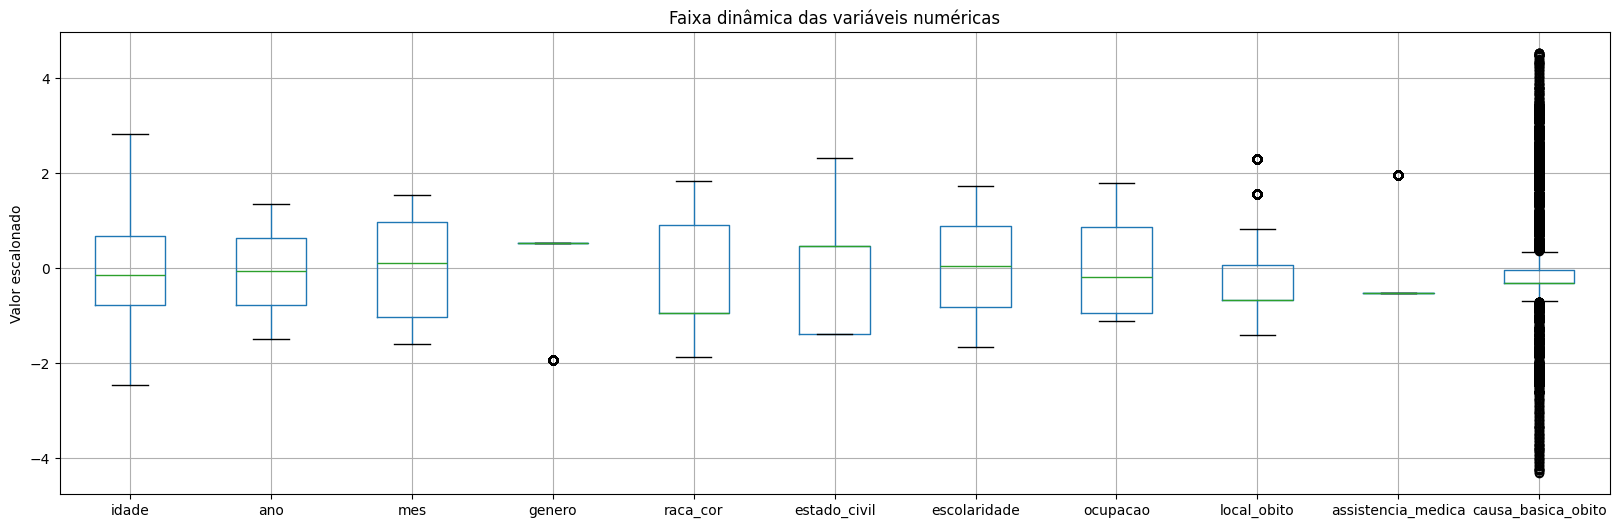

In [28]:
# Gráfico: Visualização das variáveis escalonadas
plt.figure(figsize=(20, 6))
df[all_columns_to_scale].boxplot()
plt.title('Faixa dinâmica das variáveis numéricas')
plt.ylabel('Valor escalonado')
plt.show()

> **Análise por variável após o pré-processamento**
> <br><br>
> **Idade:**
> - Tem uma amplitude considerável.
> - Outliers observados, possivelmente indicando idades muito diferentes da maioria.
>
> **Ano e Mês:**
> - Ambas as variáveis mostram distribuições discretas e uniformes, refletindo o intervalo de anos (2014-2018) e meses (1-12).
> - Não há indícios significativos de outliers, pois os dados estão dentro das faixas esperadas.
>
> **Gênero:**
> - Mostra baixa variabilidade, possivelmente devido à codificação numérica de uma variável categórica com poucas categorias (por exemplo, "Masculino" e "Feminino").
>
> **Raça/Cor:**
> - Apresenta uma distribuição equilibrada com poucos outliers, indicando alguma variabilidade.
>
> **Estado Civil, Escolaridade, Ocupação, Local de Óbito:**
> - Têm distribuições mais uniformes, mas com alguns outliers que podem indicar situações particulares (Exemplo: ocupações ou níveis de escolaridade incomuns).
>
> **Assistência Médica:**
> - Pouca variabilidade. Pode ser uma variável categórica codificada numericamente.
>
> **Causa Básica do Óbito:**
> - Muitos outliers, indicando alta diversidade nas causas.

----------------------------

# **Parte 3 - Clusterização**
## Para os dados pré-processados da etapa anterior você irá:

### 1) Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. <br>Para tal, use o índice de silhueta e as técnicas:<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) K-Médias <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b) DBScan

> Resposta:<br>
> O código a seguir realiza a seleção automática do número ótimo de clusters (`𝑘`) para o K-Médias e encontra os melhores parâmetros (`𝜖`) para o DBSCAN usando o índice de silhueta.
>
> **K-Médias**
> <br>O índice de silhueta é calculado para valores de 𝑘 no intervalo de 2 a 10.
> <br>O loop testa diferentes valores de 𝑘, treina o modelo K-Médias e calcula o índice de silhueta para cada valor.
> 
> **DBSCan**
> <br>O índice de silhueta é calculado para diferentes valores de 𝜖 no intervalo de 0.5 a 2.0 (incrementos de 0.1).
> <br>O código evita calcular o índice de silhueta quando há apenas um cluster ou quando todos os pontos são considerados ruído.
> <br>Valores inválidos para clusters únicos ou ruído são representados como −1, o que ajuda a filtrar resultados inadequados.

In [29]:
# Parte 3 - Clusterização com Seleção Automática de k e eps

# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Criando o DataFrame a partir do dataset
df, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
df = pd.DataFrame(df, columns=['Feature_1', 'Feature_2'])

# a. K-Médias: Determinando o número ideal de clusters usando o índice de silhueta
silhouette_scores = []
k_values = range(2, 11)  # Testando tamanhos de cluster de 2 a 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

# Encontrar o valor ótimo de k (o que maximiza o índice de silhueta)
optimal_k = k_values[np.argmax(silhouette_scores)]

# b. DBSCAN: Determinando os melhores parâmetros usando o índice de silhueta
eps_values = np.arange(0.5, 2.0, 0.1)
silhouette_scores_dbscan = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(df)
    unique_labels = set(labels) - {-1}  # Remove o ruído (-1)
    if len(unique_labels) > 1:  # Evitar cálculo de índice de silhueta para clusters únicos
        silhouette_scores_dbscan.append(silhouette_score(df, labels))
    else:
        silhouette_scores_dbscan.append(-1)

### 2) Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. <br>Mostre o gráfico e justifique o número de clusters escolhidos.

> Resposta:
>
> **Descrição do Processo de Mensuração do Índice de Silhueta**
> 1. Cálculo do Índice de Silhueta:
> - Para cada valor de 𝑘 no K-Médias e 𝜖 no DBSCAN, o índice de silhueta é calculado. Este índice avalia:
>   - Coesão: Quão próximos os pontos estão dentro de um mesmo cluster.
>   - Separação: Quão distintos os clusters estão uns dos outros.
> - O índice varia de -1 a 1, onde valores mais próximos de 1 indicam melhor definição de clusters.
>
> 2. Seleção do Melhor Valor:
> - Para o K-Médias, o valor de 𝑘 que maximiza o índice de silhueta é escolhido como o ótimo. 
> - Para o DBSCAN, o 𝜖 que maximiza o índice de silhueta é considerado o ideal.

> **Índices de silhueta para K-Médias**
>
> - O código encontra 𝑘 ótimo com *`np.argmax(silhouette_scores)`* e destaca o valor no gráfico com uma linha vertical vermelha.
> - O gráfico claramente mostra o ponto de máximo do índice de silhueta para justificar a escolha de 𝑘=4.

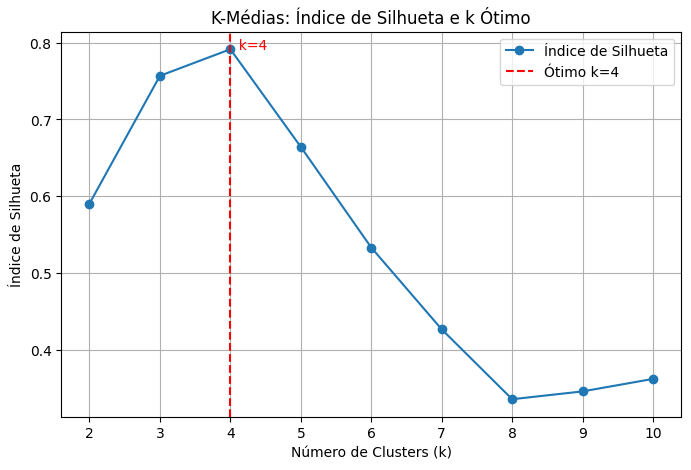

O número ideal de clusters (k) no K-Médias é: 4


In [30]:
# Encontrar o valor ótimo de k (o que maximiza o índice de silhueta)
optimal_k = k_values[np.argmax(silhouette_scores)]

# Plotando os índices de silhueta para K-Médias
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', label='Índice de Silhueta')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Ótimo k={optimal_k}')
plt.text(optimal_k, max(silhouette_scores), f'  k={optimal_k}', color='red')
plt.title('K-Médias: Índice de Silhueta e k Ótimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silhueta')
plt.legend()
plt.grid()
plt.show()

print(f"O número ideal de clusters (k) no K-Médias é: {optimal_k}")

> **Gráfico de Clusterização com K-Médias**
>
> O gráfico ilustra a clusterização realizada pelo algoritmo K-Médias com k=4. Os pontos coloridos representam os clusters, e os "X" vermelhos indicam os centróides de cada cluster.

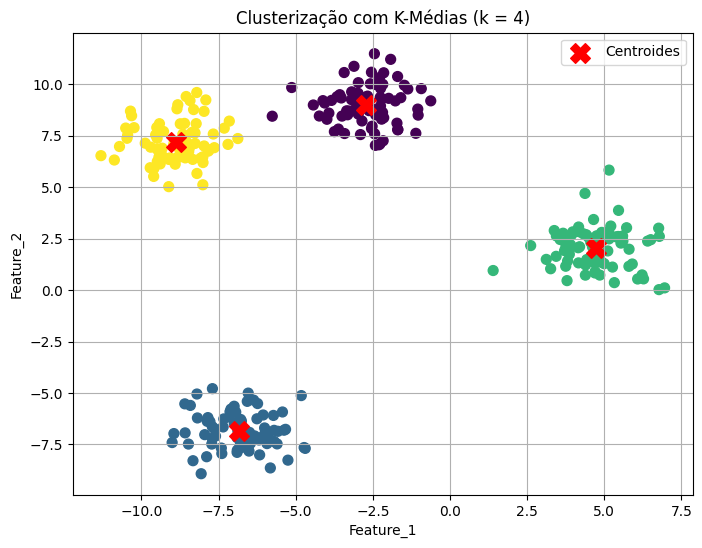

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Clusterização com K-Médias
optimal_k = 4  # Número ideal de clusters encontrado anteriormente
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans = kmeans.fit_predict(df)

# Gráfico de Clusterização
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], c=labels_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.title(f'Clusterização com K-Médias (k = {optimal_k})')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.legend()
plt.grid(True)
plt.show()


> **Índices de silhueta para DBSCAN**
>
> - De forma similar, o 𝜖 ideal é encontrado usando *`np.argmax(silhouette_scores_dbscan)`* e marcado no gráfico.
> - O gráfico demonstra que 𝜖=1.3 é o valor que maximiza o índice de silhueta.

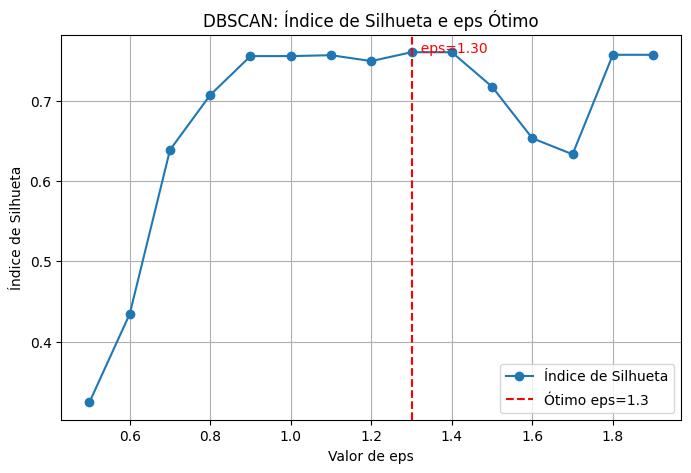

O valor ideal de eps no DBSCAN é: 1.30


In [32]:
# Encontrar o valor ótimo de eps (o que maximiza o índice de silhueta)
optimal_eps = eps_values[np.argmax(silhouette_scores_dbscan)]

# Plotando os índices de silhueta para DBSCAN
plt.figure(figsize=(8, 5))
plt.plot(eps_values, silhouette_scores_dbscan, marker='o', label='Índice de Silhueta')
if optimal_eps:
    plt.axvline(optimal_eps, color='red', linestyle='--', label=f'Ótimo eps={optimal_eps:.1f}')
    plt.text(optimal_eps, max(silhouette_scores_dbscan), f'  eps={optimal_eps:.2f}', color='red')
plt.title('DBSCAN: Índice de Silhueta e eps Ótimo')
plt.xlabel('Valor de eps')
plt.ylabel('Índice de Silhueta')
plt.legend()
plt.grid()
plt.show()

print(f"O valor ideal de eps no DBSCAN é: {optimal_eps:.2f}")

> **Gráfico de Clusterização com DBSCAN**
>
> O gráfico mostra a clusterização gerada pelo DBSCAN com ϵ=1.3. Os clusters são representados por cores distintas, enquanto os pontos sem cluster (ruído) estão em uma cor separada.

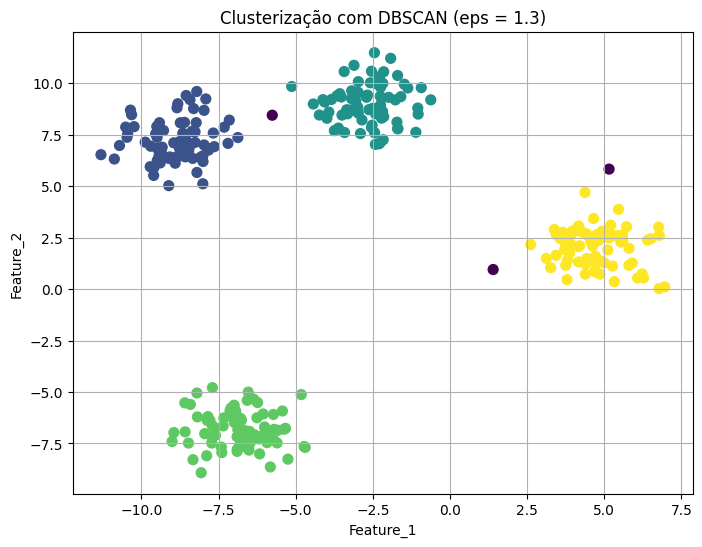

In [33]:
from sklearn.cluster import DBSCAN

# Clusterização com DBSCAN
optimal_eps = 1.3  # Valor ótimo de eps encontrado anteriormente
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
labels_dbscan = dbscan.fit_predict(df)

# Gráfico de Clusterização
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], c=labels_dbscan, cmap='viridis', s=50)
plt.title(f'Clusterização com DBSCAN (eps = {optimal_eps:.1f})')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.grid(True)
plt.show()


> **Justificativa dos Clusters Escolhidos**
> - No **K-Médias**, o índice de silhueta atinge o máximo quando 𝑘=4, indicando que 4 clusters fornecem o melhor balanço entre coesão e separação.
>
> - No **DBSCAN**, o valor de ϵ=1.3 fornece o melhor agrupamento, conforme medido pelo índice de silhueta.

### 3) Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

> **Resposta:**
>
> **Semelhanças:**
>
> - **Índice de Silhueta como Métrica:** Em ambos os casos, o índice de silhueta foi usado para avaliar a qualidade dos agrupamentos. Ele mede a proximidade de cada ponto em relação ao seu cluster e a separação em relação a outros clusters.<br><br>
> - **Variação da Qualidade com Parâmetros:** Tanto no K-Médias quanto no DBSCAN, a qualidade dos agrupamentos varia de acordo com os parâmetros: o número de clusters (`k`) no K-Médias e o raio de vizinhança (`eps`) no DBSCAN.<br><br>
> - **Identificação de Pontos Ótimos:** Ambos os algoritmos permitem identificar configurações específicas com melhor desempenho, refletidas em picos no índice de silhueta.
>
> **Diferenças:**
> <br><br>
>
 | Aspecto                     | K-Médias                                  | DBSCAN                                      |
 |-----------------------------|-------------------------------------------|--------------------------------------------|
 | **Parâmetro Principal**      | Número de clusters (`k`).                | Valor de `eps` (raio de vizinhança) e `min_samples`. |
 | **Comportamento do Gráfico** | O índice de silhueta atinge um pico claro em 4 clusters e decresce continuamente. | O índice de silhueta varia, com uma região estável entre `eps` de 1.0 a 1.4, mas flutuações fora dessa faixa. |
 | **Número de Agrupamentos**   | Define diretamente o número de clusters.  | Determina dinamicamente o número de clusters, podendo incluir ruídos (`-1`). |
 | **Tratamento de Outliers**   | Não trata diretamente outliers, atribuindo-os a clusters. | Identifica outliers explicitamente como ruídos (`-1`). |
 | **Formas dos Clusters**      | Assume clusters esféricos e balanceados. | Lida com clusters de formas arbitrárias.   |
>
> <br>
>
> **Interpretação:**
>
> **K-Médias:**
> - O gráfico do índice de silhueta mostra um pico claro para 4 clusters, consistente com a estrutura subjacente dos dados (conforme o dataset gerado).
> - Após 4 clusters, a qualidade diminui, indicando que dividir os dados em mais grupos não reflete bem a estrutura original.
>
> **DBSCAN:**
> - O índice de silhueta varia conforme o valor de `eps`. Uma faixa ótima foi observada entre `eps` de 1.0 e 1.4, com desempenho estável.
> - Fora dessa faixa, valores baixos de `eps` resultam em clusters pequenos ou ruídos excessivos, enquanto valores altos agrupam pontos em um único cluster, reduzindo a qualidade.
>
> **Conclusão:**
>
> **K-Médias:**
> - É mais adequado para dados com clusters bem definidos e de tamanhos equilibrados, como no exemplo testado.
> - Sua dependência de `k` torna-o sensível à escolha inicial do número de clusters.
>
> **DBSCAN:**
> - É mais robusto para lidar com outliers e clusters de formas irregulares. No entanto, a escolha de `eps` é crítica e pode impactar fortemente os resultados.
> - O índice de silhueta não é ideal para avaliar DBSCAN, já que clusters muito pequenos ou ruídos influenciam negativamente a métrica. Métricas alternativas, como o índice de Davies-Bouldin, podem ser mais apropriadas.


### 4) Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. <br>Observe, para a escolha, medidas adequadas aos algoritmos.

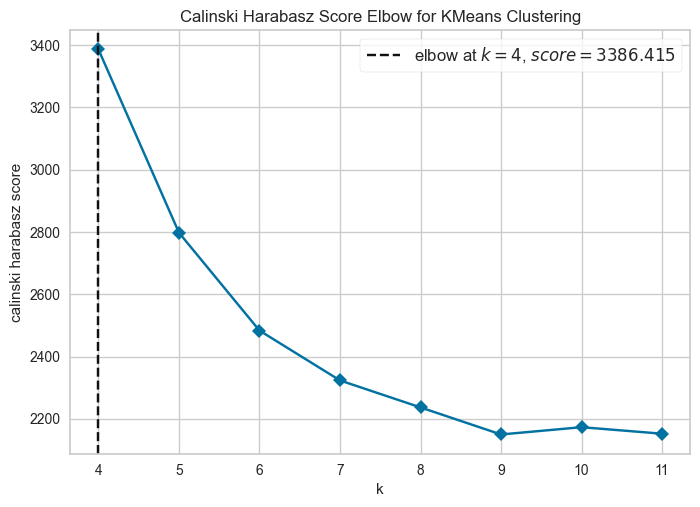

Coeficiente de Calinski-Harabasz (K-Médias): 3386.41
Índice de Davies-Bouldin (K-Médias): 0.29


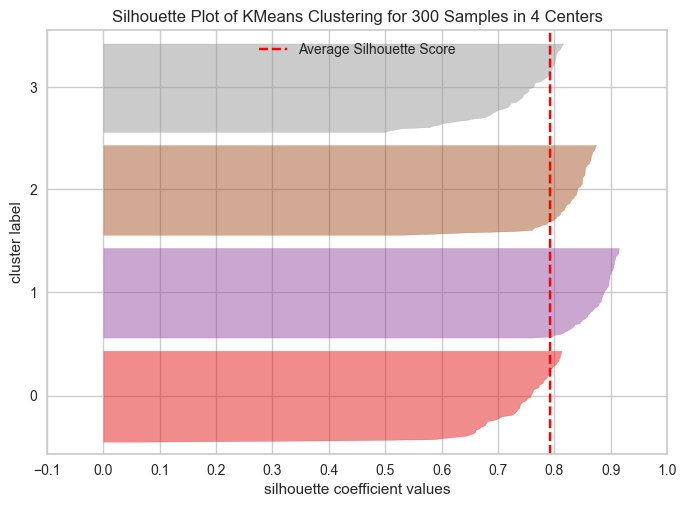

Coeficiente de Calinski-Harabasz (DBSCAN): 3564.36
Índice de Davies-Bouldin (DBSCAN): 0.29

Resumo dos resultados:
K-Médias - Calinski-Harabasz: 3386.41, Davies-Bouldin: 0.29
DBSCAN - Calinski-Harabasz: 3564.36, Davies-Bouldin: 0.29


In [34]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import pandas as pd
import numpy as np

# Usando KElbowVisualizer para determinar o número ideal de clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(4, 12), metric='calinski_harabasz', timings=False)

visualizer.fit(df)  # Ajusta os dados ao visualizador
visualizer.show()  # Exibe o gráfico de cotovelo (Elbow)

# Calculando as métricas para K-Médias
optimal_k = visualizer.elbow_value_  # Obtém o número ideal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df)

ch_kmeans = calinski_harabasz_score(df, kmeans_labels)
db_kmeans = davies_bouldin_score(df, kmeans_labels)

# Exibindo as métricas para K-Médias
print(f"Coeficiente de Calinski-Harabasz (K-Médias): {ch_kmeans:.2f}")
print(f"Índice de Davies-Bouldin (K-Médias): {db_kmeans:.2f}")

# Visualizando a qualidade dos clusters com SilhouetteVisualizer
silhouette_visualizer = SilhouetteVisualizer(KMeans(n_clusters=optimal_k, random_state=42))
silhouette_visualizer.fit(df)
silhouette_visualizer.show()

# Usando DBSCAN com validação
dbscan = DBSCAN(eps=1.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)

# Filtrando os dados válidos para DBSCAN
valid_data = df[dbscan_labels != -1]
valid_labels = dbscan_labels[dbscan_labels != -1]

# Calculando as métricas para DBSCAN
if len(set(valid_labels)) > 1:  # Verifica se há mais de um cluster válido
    ch_dbscan = calinski_harabasz_score(valid_data, valid_labels)
    db_dbscan = davies_bouldin_score(valid_data, valid_labels)
else:
    ch_dbscan = db_dbscan = None

# Exibindo as métricas para DBSCAN
if ch_dbscan is not None:
    print(f"Coeficiente de Calinski-Harabasz (DBSCAN): {ch_dbscan:.2f}")
    print(f"Índice de Davies-Bouldin (DBSCAN): {db_dbscan:.2f}")
else:
    print("DBSCAN: Não há clusters válidos para calcular os índices.")

# **Resumo**
print("\nResumo dos resultados:")
print(f"K-Médias - Calinski-Harabasz: {ch_kmeans:.2f}, Davies-Bouldin: {db_kmeans:.2f}")
if ch_dbscan is not None:
    print(f"DBSCAN - Calinski-Harabasz: {ch_dbscan:.2f}, Davies-Bouldin: {db_dbscan:.2f}")
else:
    print("DBSCAN - Não foi possível calcular métricas para clusters válidos.")


**Resposta:**

**K-Médias:**
- Calinski-Harabasz: 3386.41
- Davies-Bouldin: 0.29

**DBSCAN:**
- Calinski-Harabasz: 3564.36
- Davies-Bouldin: 0.29

**Análise dos Resultados**
- **Coeficiente de Calinski-Harabasz:**
  - Valores mais altos para DBSCAN (**3564.36**) indicam que os clusters gerados por este método são mais densos e bem separados do que os clusters formados pelo K-Médias (**3386.41**).
  - Isso reflete a capacidade do DBSCAN de lidar com clusters de formas irregulares e com outliers, características que são mais desafiadoras para o K-Médias.

- **Índice de Davies-Bouldin:**
  - Os valores de Davies-Bouldin são iguais para ambos os métodos (**0.29**), sugerindo que, neste caso, tanto o DBSCAN quanto o K-Médias criaram clusters com níveis equivalentes de coesão interna e separação entre os grupos.
  - Não há evidência de superioridade entre os métodos com base nessa métrica.

**Conclusão**
- Ambas as métricas complementam o índice de silhueta, oferecendo perspectivas adicionais sobre coesão e separação.
- O DBSCAN apresentou um coeficiente de Calinski-Harabasz superior, destacando sua adequação para dados com formas de clusters mais complexas ou com outliers.
- O K-Médias, por outro lado, é uma escolha sólida para dados onde os clusters têm formas esféricas e bem definidas, como indicado pela equivalência nos valores de Davies-Bouldin e pela qualidade geral dos clusters formados.


In [35]:
# Proporção de Ruído
def noise_proportion(labels):
    n_noise = np.sum(labels == -1)
    return n_noise / len(labels)

# Calculando para o DBSCAN com o melhor eps encontrado
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)
noise_ratio = noise_proportion(dbscan_labels)

print(f"Proporção de Ruído (DBSCAN, eps={optimal_eps}): {noise_ratio:.2f}")


Proporção de Ruído (DBSCAN, eps=1.3): 0.01


> O resultado indica que a proporção de ruído no agrupamento DBSCAN com o parâmetro eps=1.3 é 0.01, ou seja, 1% dos pontos foram classificados como ruído pelo algoritmo.

### 5) Realizando a análise, responda: <br>A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

> Resposta:
>
> O índice de silhueta é útil para avaliar a qualidade da configuração dos clusters no DBSCAN, mas não é o índice mais indicado para escolher o número de clusters, especialmente porque o DBSCAN não define clusters explicitamente como outros algoritmos (K-Means, por exemplo).<br>
> No DBSCAN, é mais adequado analisar o comportamento do algoritmo com diferentes valores de eps e *`min_samples`*, além de usar ferramentas como gráficos de densidade ou inspeção visual para interpretar os resultados.

# Parte 4 - Medidas de similaridade

### 1) Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

> Resposta:
>
> Passos necessários para agrupar séries temporais utilizando o valor máximo de correlação cruzada:
> 1. **Carregar as séries temporais:**
> - Obter as 10 séries temporais e organizar em um formato adequado (por exemplo, um dataframe ou matriz).
> 2. **Normalizar as séries temporais:**
> - Certificar que as séries possuem a mesma escala (exemplo: padronizar valores para média zero e desvio-padrão 1).
> 3. **Calcular a correlação cruzada:**
> - Para cada par de séries temporais, calcular a correlação cruzada.
> - Identificar o valor máximo da correlação cruzada para cada par, independentemente do deslocamento temporal.
> 4. **Criar uma matriz de similaridade:**
> - Montar uma matriz *n×n*, onde n é o número de séries temporais.
> - Cada elemento *(i,j)* da matriz deve conter o valor máximo de correlação cruzada entre as séries *i e j*.
> 5. **Aplicar um algoritmo de clusterização:**
> - Usar a matriz de similaridade como entrada para o algoritmo escolhido.
> - Determinar o número de clusters desejado (3, neste caso).
> 6. **Avaliar os clusters:**
> - Analisar os resultados e, se necessário, ajustar os parâmetros do algoritmo.
> 7. **Visualizar os resultados:**
> - Gerar gráficos, como dendrogramas (para clusterização hierárquica) ou agrupamentos plotados em um espaço reduzido (ex.: PCA ou t-SNE).


### 2) Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

> Resposta:
>
> **Algoritmo sugerido:**
> - Clusterização Hierárquica (Hierarchical Clustering)
>
> **Justificativa:**
> - A clusterização hierárquica é adequada porque pode usar uma matriz de similaridade diretamente, sem a necessidade de transformar os dados em um espaço métrico.
> - Permite a visualização do agrupamento em diferentes níveis através de um dendrograma, ajudando na interpretação.
> - É particularmente útil em casos onde o número de clusters desejado é conhecido a priori, como neste caso (3 clusters).

### 3) Indique um caso de uso para essa solução projetada.


> Resposta:
>
> **Caso de uso para a solução projetada:**
> - Agrupamento de sensores de monitoramento ambiental:
>   - Imagine que 10 sensores estão monitorando a temperatura em diferentes localidades ao longo do tempo.
>   - A solução pode agrupar sensores com padrões de comportamento semelhantes, identificando regiões com condições climáticas similares ou padrões de variação correlacionados.

### 4) Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

> Resposta:
>
> Outra estratégia para medir a similaridade entre séries temporais:
> - Medição de similaridade por Distância Dinâmica de Tempo (DTW - Dynamic Time Warping)
>
> **Passos necessários:**
> 1. **Preparar as séries temporais:**
> - Certifique-se de que as séries estão normalizadas para evitar influência de amplitude.
> 2. **Calcular a distância DTW:**
> - Para cada par de séries, calcule a distância DTW, que mede a similaridade permitindo variações no alinhamento temporal.
> 3. **Criar uma matriz de distância:**
> - Construa uma matriz *n×n*, onde cada elemento *(i,j)* representa a distância DTW entre as séries 
*i e j*.
> 4. **Aplicar clusterização:**
> - Utilize a matriz de distância como entrada para algoritmos de clusterização que aceitem métricas personalizadas (ex.: DBScan ou Clusterização Hierárquica).
> 5. **Validar e interpretar os clusters:**
> - Analise os agrupamentos gerados para verificar se refletem as similaridades esperadas.
> 6. **Visualizar os clusters:**
> - Gere gráficos para mostrar os resultados (dendrogramas, MDS, ou projeções t-SNE).

--------------------------------------

## Rubricas do trabalho

1. **O aluno escolheu o número de clusters para o algoritmo de K-Médias usando o índice de silhueta?**  
   ✅ O número de clusters foi determinado usando o índice de silhueta.  
   **Questão relacionada:** 3.1.

2. **O aluno indicou outras duas medidas de validação para mensurar a qualidade dos modelos?**  
   ✅ Foram usadas as medidas de Davies-Bouldin e Calinski-Harabasz, além do índice de silhueta.  
   **Questão relacionada:** 3.4.

3. **O aluno comparou os resultados obtidos nos dois modelos?**  
   ✅ Foi comparado os resultados do K-Médias e DBScan, destacando semelhanças e diferenças.  
   **Questão relacionada:** 3.3.

4. **O aluno indicou a validade de usar o índice de silhueta para a clusterização com DBScan?**  
   ✅ A validade do índice de silhueta para DBScan foi discutida.  
   **Questão relacionada:** 3.5.

5. **O aluno está rodando uma versão atualizada de Python?**  
   ✅ Está usando a versão 3.12.4, que é uma versão atualizada.  
   **Questão relacionada:** 1.1.

6. **O aluno está usando ambiente virtual de desenvolvimento?**  
   ✅ Foi confirmado o uso do ambiente virtual `infnet-24E4-3` no Anaconda.  
   **Questão relacionada:** 1.2.

7. **O aluno gerou um arquivo de requerimentos com os pacotes com as respectivas versões?**  
   ✅ Foi gerado um arquivo `requirements.txt` com as dependências e versões, além de um arquivo `environment.yml`.  
   **Questão relacionada:** 1.4.

8. **O aluno gerou uma prova do ambiente rodando localmente?**  
   ✅ Capturas de tela foram enviadas mostrando o ambiente rodando no Visual Studio Code e no Anaconda Navigator.  
   **Questão relacionada:** 1.5.

9. **O aluno disponibilizou seu trabalho em repositório público Git (ex. Github)?**  
   ✅ O trabalho está disponível em um repositório público no GitHub.  
   **Questão relacionada:** 1.6.

10. **O aluno descreveu em tópicos os passos necessários para estabelecer a correlação cruzada entre séries temporais como uma medida de similaridade?**  
    ✅ Os passos foram descritos de forma detalhada.  
    **Questão relacionada:** 4.1.

11. **O aluno indicou e justificou o algoritmo de clusterização que ele escolheria?**  
    ✅ O algoritmo de clusterização hierárquica foi indicado e justificado.  
    **Questão relacionada:** 4.2.

12. **O aluno indicou um caso de uso para a solução projetada?**  
    ✅ O caso de uso apresentado foi o agrupamento de sensores de monitoramento ambiental.  
    **Questão relacionada:** 4.3.

13. **O aluno indicou uma segunda estratégia para determinar a similaridade entre as séries temporais?**  
    ✅ Foi sugerida a Distância Dinâmica de Tempo (DTW) como uma estratégia alternativa, com passos detalhados.  
    **Questão relacionada:** 4.4.

14. **O aluno escolheu uma base de interesse?**  
    ✅ A base `datasus_suicidio_2014_2018` foi escolhida.  
    **Questão relacionada:** 2.1.

15. **O aluno justificou a escolha da base de interesse?**  
    ✅ A justificativa foi apresentada.
    **Questão relacionada:** 2.2.

16. **O aluno apresentou a faixa dinâmica para cada uma das dimensões da base?**  
    ✅ Foram apresentados gráficos mostrando a faixa dinâmica das variáveis.  
    **Questão relacionada:** 2.3.

17. **O aluno realizou o pré-processamento adequado dos dados?**  
    ✅ O pré-processamento foi realizado, incluindo renomeação de colunas, limpeza de dados e outros passos.  
    **Questão relacionada:** 2.4.

18. **O aluno criou um modelo usando o algoritmo de K-Médias?**  
    ✅ Um modelo foi criado com o algoritmo de K-Médias.  
    **Questão relacionada:** 3.1.

19. **O aluno soube escolher o número ótimo de clusters para os modelos desenvolvidos?**  
    ✅ O número ótimo de clusters foi determinado para ambos os modelos usando métodos de validação, como o índice de silhueta.  
    **Questão relacionada:** 3.1, 3.2.

20. **O aluno criou um modelo usando o algoritmo de DBScan?**  
    ✅ Um modelo foi criado com o algoritmo DBScan.  
    **Questão relacionada:** 3.1.
